In [1]:
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [14]:
import os
import pandas as pd
import seaborn as sns

In [3]:
train_df= pd.read_csv("data/stage_2_train.csv")
train_df.head(8)

,ID,Label
0,ID_12cadc6af_epidural,0
1,ID_12cadc6af_intraparenchymal,0
2,ID_12cadc6af_intraventricular,0
3,ID_12cadc6af_subarachnoid,0
4,ID_12cadc6af_subdural,0
5,ID_12cadc6af_any,0
6,ID_38fd7baa0_epidural,0
7,ID_38fd7baa0_intraparenchymal,0


In [6]:
train_df["Label"].unique()

array([0, 1], dtype=int64)

In [8]:
train_df["sub_type"] = train_df["ID"].apply(lambda x:x.split("_")[-1])
train_df["file_id"] = train_df["ID"].apply(lambda x: "_".join(x.split("_")[:2])+".dcm")
train_df.head(10)

,ID,Label,sub_type,file_id
0,ID_12cadc6af_epidural,0,epidural,ID_12cadc6af.dcm
1,ID_12cadc6af_intraparenchymal,0,intraparenchymal,ID_12cadc6af.dcm
2,ID_12cadc6af_intraventricular,0,intraventricular,ID_12cadc6af.dcm
3,ID_12cadc6af_subarachnoid,0,subarachnoid,ID_12cadc6af.dcm
4,ID_12cadc6af_subdural,0,subdural,ID_12cadc6af.dcm
5,ID_12cadc6af_any,0,any,ID_12cadc6af.dcm
6,ID_38fd7baa0_epidural,0,epidural,ID_38fd7baa0.dcm
7,ID_38fd7baa0_intraparenchymal,0,intraparenchymal,ID_38fd7baa0.dcm
8,ID_38fd7baa0_intraventricular,0,intraventricular,ID_38fd7baa0.dcm
9,ID_38fd7baa0_subarachnoid,0,subarachnoid,ID_38fd7baa0.dcm


In [10]:
train_df.shape

(4516842, 4)

In [18]:
train_df["sub_type"].unique()

array(['epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid',
       'subdural', 'any'], dtype=object)

In [20]:
len(train_df["sub_type"].unique())

6

In [11]:
print("Number of train images: ", len(os.listdir("data/stage_2_train/")))

Number of train images:  752803


## Distribution of each hemorrage subtype

### Epidural

In [13]:
train_df[train_df["sub_type"] == "epidural"]["Label"].value_counts()

0    749662
1      3145
Name: Label, dtype: int64

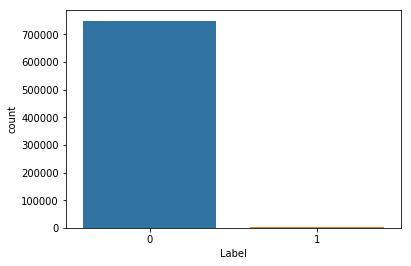

In [15]:
sns.countplot(x="Label", data = train_df[train_df["sub_type"]== "epidural"])

### Intraparenchymal

In [21]:
train_df[train_df["sub_type"] == "intraparenchymal"]["Label"].value_counts()

0    716689
1     36118
Name: Label, dtype: int64

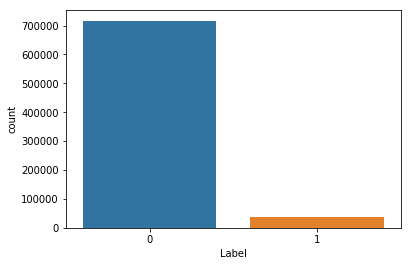

In [23]:
sns.countplot(x= "Label", data = train_df[train_df["sub_type"] == "intraparenchymal"])

### Intraventricular

In [24]:
train_df[train_df["sub_type"] == "intraventricular"]["Label"].value_counts()

0    726602
1     26205
Name: Label, dtype: int64

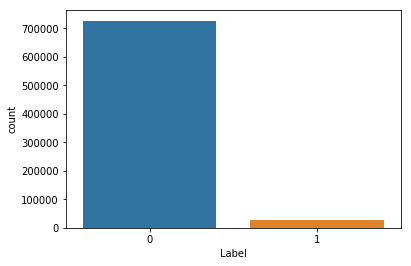

In [25]:
sns.countplot(x = "Label", data = train_df[train_df["sub_type"] == "intraventricular"])

### Subarachnoid

In [26]:
train_df[train_df["sub_type"] == "subarachnoid"]["Label"].value_counts()

0    717132
1     35675
Name: Label, dtype: int64

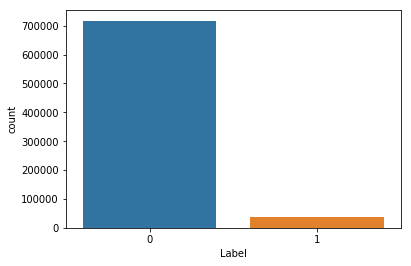

In [29]:
sns.countplot(x = "Label", data = train_df[train_df["sub_type"] == "subarachnoid"])

In [ ]:
### Sbdural